# The rate of change of atmospheric CO$_2$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

## Import the Mauna Loa annual mean data

In [2]:
mauna_loa_data_url = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv'

mauna_loa_co2 = pd.read_csv(mauna_loa_data_url, comment = '#')

mauna_loa_co2.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


## Calculate the rate of change

We seek to address the question "what is the rate of change of the Mauna Loa CO$_2$ data?"

### Year to year rate of change

One approach is to calculate this value directly from the data. The code below goes through each row of the data frame and subtracts the value in the next row from the value in the current row to get the change from one year to the next. 

In [3]:
mauna_loa_co2['change_rate'] = np.zeros(len(mauna_loa_co2))

for i in range(0,len(mauna_loa_co2)-1):
    CO2_difference = mauna_loa_co2['mean'][i+1] - mauna_loa_co2['mean'][i]
    time_difference = mauna_loa_co2['year'][i+1] - mauna_loa_co2['year'][i]
    mauna_loa_co2.at[i,'change_rate'] = CO2_difference/time_difference

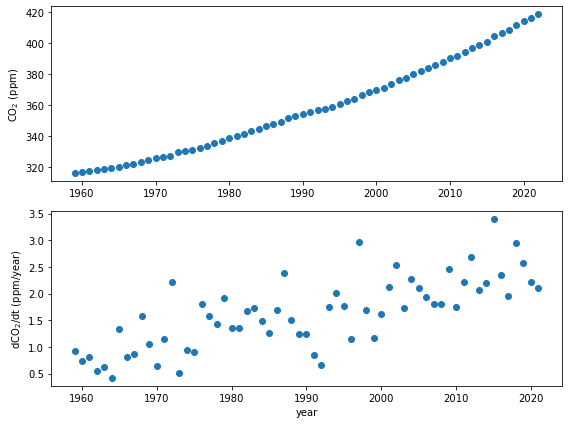

In [4]:
plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
plt.scatter(mauna_loa_co2['year'],mauna_loa_co2['mean'],
            label='Mauna Loa pCO$_2$')
plt.ylabel('CO$_2$ (ppm)')
plt.subplot(2,1,2)
plt.scatter(mauna_loa_co2['year'][:-1],mauna_loa_co2['change_rate'][:-1],label='Mauna Loa pCO$_2$')
plt.ylabel('dCO$_2$/dt (ppm/year)')
plt.xlabel('year')
plt.tight_layout()

This approach is arguably the most direct, but it is also suffers from being prone to noise. Uncertainty in the measurement or variability in the process is amplified.

### Linear regression

In your last assignment you applied a linear regression to the Mauna Loa CO$_2$. Go ahead and and fit a linear regression to the last 20 years of data. The slope of this linear regression is the rate of change (dCO$_2$/dt in ppm/year).

```
stats.linregress(co2_last_20yrs['year'],co2_last_20yrs['mean_co2'])
```

Do the linear regression and plot it with the data (**3 points**)

What is the value for the slope? How does this compare to the estimate you could get through looking at the year to year rate of change? Do you think this approach is a better or worse way to estimate the trend? Why? (**3 points**)

*write your answer here*

### Locally weighted regression

It would be nice to be able to fit a smooth curve through the data, but not make a lot of assumptions about what the functional form of the data it. That is, it could be preferable not to assume that the data are going to be well-represented by a 1st or 2nd order polynomial like we did for last weeks assignment. One approach that can be taken is to apply Locally Weighted Scatterplot Smoothing (LOWESS).

Here is a slightly irritating, but informative video that explains locally-weighted regression. Go ahead and watch it:

https://www.youtube.com/watch?v=Vf7oJ6z2LCc

The example code below is slightly modified from the documentation of the Python module statsmodels: https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
In this code, noisy data associated with a sine curve are simulated. The ```nonparametric.lowess``` function is then applied to the data using two different fractions of the data (i.e. how much of the data is considered by the local weighting).

*Note that the ```lowess``` function returns a two column numpy array. The x-values are the first column and the y-values are the second column. They are accessed using the [:,0] notation that can be applied to numpy arrays.*

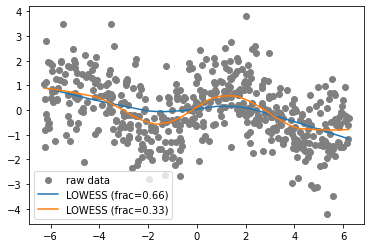

In [5]:
import statsmodels.api as sm

lowess = sm.nonparametric.lowess
x = np.random.uniform(low = -2*np.pi, high = 2*np.pi, size=500)
y = np.sin(x) + np.random.normal(size=len(x))
z = lowess(y, x, frac=0.66)
w = lowess(y, x, frac=0.33)

plt.scatter(x,y,color='grey',label='raw data')
plt.plot(z[:,0],z[:,1],label='LOWESS (frac=0.66)')
plt.plot(w[:,0],w[:,1],label='LOWESS (frac=0.33)')
plt.legend()
plt.show()

### Use the LOWESS function to fit curves to the Mauna Loa data (2 points)

Note that the arguments to the function need to be the y-values of the observed pointsmfirst and then the x-values of the observed points (which is kind of counter intuitive).

```
lowess(mauna_loa_co2['mean'],mauna_loa_co2['year'])
```

Calculate, plot, and label three different LOWESS regressions using three different ```frac``` values (**6 points**)

Of the different frac values that you explored using, which one do you think is best for the data (**1 point**)

*write your answer here*

### Calculate the rate of change from the LOWESS curve

You can calculate a rate of change from the smoothed LOWESS curves. For example, if one has calculated a LOWESS and called it `mauna_loa_lowess2`, the following code will calculate the change between each year on the smoothed curve.

In [ ]:
LOWESS_change_rate = []

for n in range(0,len(mauna_loa_lowess2)-1):
    co2_change = mauna_loa_lowess2[n+1][1]-mauna_loa_lowess2[n][1]
    year_change = mauna_loa_lowess2[n+1][0]-mauna_loa_lowess2[n][0]
    LOWESS_change_rate.append(co2_change/year_change)
    
plt.plot(mauna_loa_lowess2[:,0][:-1],LOWESS_change_rate,label='LOWESS (frac=0.4)')
plt.ylabel('dCO$_2$/dt (ppm/year)')
plt.xlabel('year')
plt.show()

### Make these calculations of the change rate and plot the result for three different LOWESS fits with different `frac` values (3 points)

Using this approach, what would you say the rate of CO$_2$ increase has been over the past 10 years in ppm/year? (**1 point**)

*write your answer here*

## Ice core data

Let's import the ice core data.

In [9]:
ice_core_data_url = 'https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt'

ice_core_co2 = pd.read_table(ice_core_data_url, comment='#')
ice_core_co2.head()

,age_gas_calBP,co2_ppm,co2_1s_ppm
0,-51.03,368.02,0.06
1,-48.00,361.78,0.37
2,-46.28,359.65,0.10
3,-44.41,357.11,0.16
4,-43.08,353.95,0.04


We can convert the age into the same calendar year timescale as the Mauna Loa data. The data set goes back to more than 800,000 years ago which is expressed in the calculated year column as a negative number where the negative number represents the years before the common era.

In [10]:
ice_core_co2['year'] = -(ice_core_co2['age_gas_calBP'] - 1950)
ice_core_co2.head()

,age_gas_calBP,co2_ppm,co2_1s_ppm,year
0,-51.03,368.02,0.06,2001.03
1,-48.00,361.78,0.37,1998.00
2,-46.28,359.65,0.10,1996.28
3,-44.41,357.11,0.16,1994.41
4,-43.08,353.95,0.04,1993.08


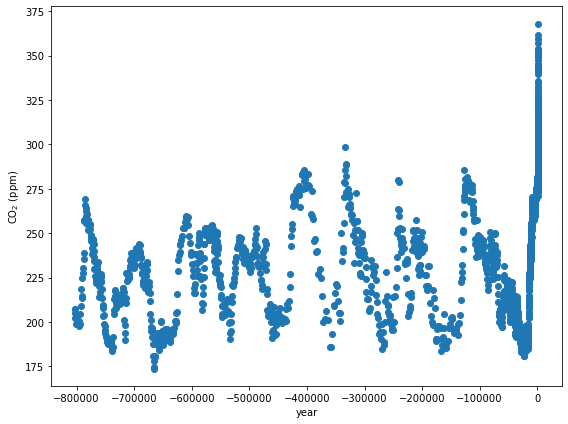

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(ice_core_co2['year'],ice_core_co2['co2_ppm'])
plt.ylabel('CO$_2$ (ppm)')
plt.xlabel('year')
plt.tight_layout()
plt.show()

Looking at this record we can see that there have been numerous times when CO$_2$ has increased and decreased over the past 800,000 years (the glacial-interglacial cycles). Let's consider the last two times that there has been a natural increase in CO$_2$ that which occurred from year -16000 to -9000 (coming out of the last glacial maximum) and that which occurred from year -135000 to -125000.

Plot the ice core CO$_2$ data over both of these intervals of CO$_2$ change. (**2 points**)

Estimate the rate of change for each using:
- rate of change calculations made through subtraction as was done above for the Mauna Loa data (**3 points**)
- linear regression where the slope is analyzed (**3 points**)
- LOWESS regression followed by rate of change analysis (**3 points**)

How do these rates of change estimated from the ice core data compare to the modern-day rate of CO$_2$ change? (**2 points**)

*write your answer here*